## Introduction to SciKit Learn

what_we're_covering

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end SciKit-Learn Workflow

In [ ]:
# Get the Data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("Heart_diesease.csv")
heart_disease

In [2]:
# Create X (Features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (Labels)
Y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the data
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
# Make a prediction
y_label = clf.predict(np.array(0, 2, 3, 4))

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [18]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y_train

6      1
260    0
21     1
76     1
278    0
      ..
92     1
269    0
292    0
301    0
16     1
Name: target, Length: 242, dtype: int64

In [21]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3


In [22]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [23]:
# Evaluate the model on the training data
clf.score(x_train, y_train)

1.0

In [24]:
# evaluate the model on the test data
clf.score(x_test, y_test)

0.8360655737704918

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.83      0.83      0.83        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [27]:
confusion_matrix(y_test, y_preds)

array([[27,  5],
       [ 5, 24]], dtype=int64)

In [28]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [34]:
# Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators.....")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators.....
Model accuracy on test set: 81.97%
 
Trying model with 20 estimators.....
Model accuracy on test set: 78.69%
 
Trying model with 30 estimators.....
Model accuracy on test set: 81.97%
 
Trying model with 40 estimators.....
Model accuracy on test set: 77.05%
 
Trying model with 50 estimators.....
Model accuracy on test set: 77.05%
 
Trying model with 60 estimators.....
Model accuracy on test set: 78.69%
 
Trying model with 70 estimators.....
Model accuracy on test set: 77.05%
 
Trying model with 80 estimators.....
Model accuracy on test set: 80.33%
 
Trying model with 90 estimators.....
Model accuracy on test set: 77.05%
 


In [35]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("Random_forest_model_1.pkl", "wb"))

In [36]:
loaded_model = pickle.load(open("Random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.7704918032786885

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
Car_sales = pd.read_csv("Car_sales.csv")
Car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [36]:
Car_sales["Price"] = Car_sales["Price"].str.replace(".", "")
Car_sales["Price"] = Car_sales["Price"].str.replace(",", "")
Car_sales["Price"] = Car_sales["Price"].str.replace("$", "")
Car_sales["Price"] = Car_sales["Price"].str[:-1]
Car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [37]:
X = Car_sales.drop("Price", axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4


In [38]:
Y = Car_sales["Price"]
Y

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: object

In [39]:
# split it into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
# Build Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [41]:
# converting categoricals to numerical value
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_Features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_Features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [43]:
Car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500


In [42]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [22]:
dummies = pd.get_dummies(Car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,False,False,True,False,False,False,False,True
1,4,False,True,False,False,False,False,False,True,False
2,3,False,False,False,True,False,True,False,False,False
3,5,True,False,False,False,True,False,False,False,False
4,4,False,False,True,False,False,False,False,False,True
5,4,False,False,False,True,False,False,True,False,False
6,4,False,True,False,False,False,True,False,False,False
7,4,False,True,False,False,False,True,False,False,False
8,4,False,False,False,True,False,False,False,False,True
9,4,False,False,True,False,False,False,False,False,True


In [23]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)

model.fit(X_train, Y_train)

RandomForestRegressor()

In [24]:
model.score(X_test, Y_test)

-1.2793638399999998

### 1.2 What if there were missing values?

1. Fill the with some value(also known as imputation)
2. Remove the samples with missing data altogether

In [44]:
Car_missing = pd.read_csv("Car_sales_missing_data.csv")
Car_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [47]:
X = Car_missing.drop("Price", axis=1)
Y = Car_missing["Price"]

### Filling data with Pandas

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_Features = ["Make", "Colour", "Odometer", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_Features)],
                               remainder="passthrough")

tranformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [49]:
# Fill the "Make" column
Car_missing["Make"].fillna("missing", inplace=True) 
# Fill the "Colour" column
Car_missing["Colour"].fillna("missing", inplace=True)
# Fill the "Odometer (KM)" column
Car_missing["Odometer"].fillna(Car_missing["Odometer"].mean(), inplace=True)
# Fill the "Doors" column
Car_missing["Doors"].fillna(4, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11480\3293801968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Car_missing["Make"].fillna("missing", inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11480\3293801968.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [50]:
Car_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,4.0,NaN
9,missing,White,31600.000000,4.0,"$9,700"


In [42]:
Car_missing.dropna(inplace=True)

In [56]:
Car_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
9,NaN,White,31600.0,4.0,"$9,700"


In [51]:
X = Car_missing.drop("Price", axis=1)
Y = Car_missing["Price"]

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_Features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_Features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(Car_missing)
transformed_X

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 150043.0, '$4,000 '],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 87899.0, '$5,000 '],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 92302.66666666667, '$7,000 '],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 11179.0, '$22,000 '],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 213095.0, '$3,500 '],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 92302.66666666667, '$4,500 '],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 92302.66666666667, '$7,500 '],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 92302.66666666667, nan],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 60000.0, nan],
      

In [53]:
Car_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [54]:
Car_missing.dropna(subset=["Price"], inplace=True)
Car_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
9,missing,White,31600.000000,4.0,"$9,700"


### Filling missing data with scikit-Learn

In [55]:
# Split into X & Y
X = Car_missing.drop("Price", axis=1)
Y = Car_missing["Price"]

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical Values with "missing" & Numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") #Categorical values
door_imputer = SimpleImputer(strategy="most_frequent")
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])
# Transform the Data
filled_X = imputer.fit_transform(X)
Car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer"])
Car_sales_filled

,Make,Colour,Doors,Odometer
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,87899.0
2,Toyota,Blue,3.0,92302.666667
3,BMW,Black,5.0,11179.0
4,Nissan,White,4.0,213095.0
5,Toyota,Green,4.0,92302.666667
6,Honda,missing,4.0,92302.666667
7,missing,White,4.0,31600.0


In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_Features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_Features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(Car_sales_filled)
transformed_X

<8x15 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [59]:
# Lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: '$4,000 '

## 2. Choosing the right estimator/algorithm for our Problem

Scikit-learn uses estimators as another term for machine learning model or algorithm

#### 2.1 Picking a machine learning model for a regression problem

In [11]:
# Import Boston Housing Datasets
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes;

In [12]:
diabetes_df = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
diabetes_df["target"] = pd.Series(diabetes["target"])
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
len(diabetes_df), diabetes_df.columns

(442,
 Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
        'target'],
       dtype='object'))

In [14]:
# Try the Ridge Regression Model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = diabetes_df.drop("target", axis=1)
Y = diabetes_df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

model.score(X_test, Y_test)

0.42417421495301266

In [18]:
heart_disease = pd.read_csv("Heart_diesease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#  Try Linear SVC estimator class
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [7]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

## 3. Fit the model/algorithm on our Data and use it to make prediction

X = features, features variables, data
Y = labels, targets

In [5]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
# Fit the model to the data
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [6]:
# Use a trained model to make prediction
# you can make use of 2 methods:
# 1). Predict()
# 2). Predict_proba()
y_preds = clf.predict(X_test)
np.mean(y_preds == Y_test)

0.8524590163934426

In [7]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_preds)

0.8524590163934426

Make Predictions with 'predict_proba()'

In [9]:
# predict_proba() returns probabilities of a classifictaion label
clf.predict_proba(X_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [13]:
clf.predict(X_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [14]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the Data
X = diabetes_df.drop("target", axis=1)
Y = diabetes_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, Y_train)

Y_preds = model.predict(X_test)

In [16]:
Y_preds[:10]

array([149.27, 178.86, 162.81, 249.8 , 109.28, 121.36, 242.  , 210.64,
       148.7 , 177.69])

In [11]:
np.array(Y_test[:10])

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.])

In [12]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

44.53921348314607

## 4. Evaluating A Machine Learning Model.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier()

clf.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
clf.score(X_train, Y_train)

1.0

In [19]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the Data
X = diabetes_df.drop("target", axis=1)
Y = diabetes_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, Y_train)


In [20]:
model.score(X_test, Y_test)

0.42417421495301266

In [4]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [5]:
# Returns an array of score for each cross validation carried out
cross_val_score(clf, X, Y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [23]:
# Single training and test split score
clf_single_score = clf.score(X_test, Y_test)

# Take the mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, cv=10))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8346236559139785)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

clf = RandomForestClassifier()
cross_valscore = cross_val_score(clf, X, Y, cv=5)

In [25]:
print(f"Heart Disease Classifier Cross Validated Accuracy: {np.mean(cross_valscore) * 100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy: 82.48%


**Area under the reciever operating characteristics curve (AUC/ROC)**

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [18]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [19]:
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positive)
fpr, tpr
roc_auc_score(Y_test, y_probs_positive)

0.9304956896551724

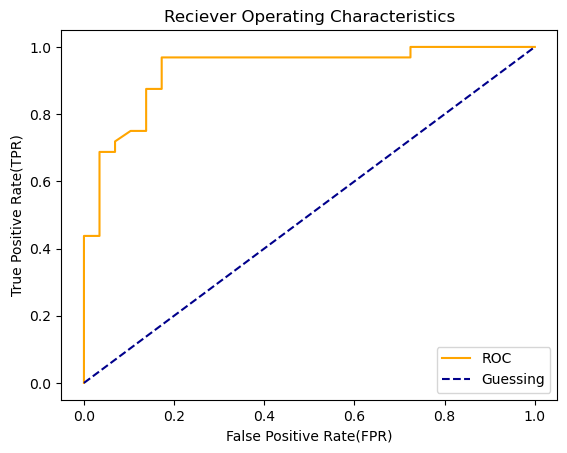

In [34]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given a FPR and TPR of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize plot
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("Reciever Operating Characteristics")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr);

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_probs_positive)

0.9304956896551724

### confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [28]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


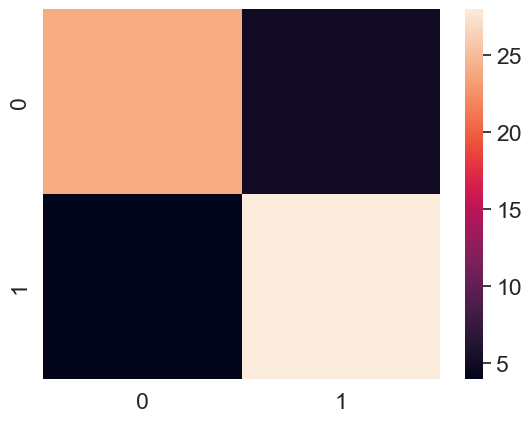

In [37]:
import seaborn as sns

sns.set(font_scale=1.5)

Conf_mat = confusion_matrix(Y_test, y_preds)

sns.heatmap(Conf_mat);

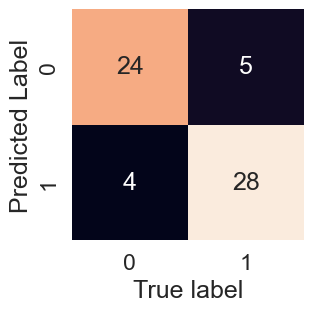

In [31]:
# function that plots a confuison matrix using seaborn's heatmadp;
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted Label");
plot_conf_mat(Conf_mat)

### Classification Report

In [38]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Regression Model Evaluation Metrics

In [13]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = diabetes_df.drop("target", axis=1)
Y = diabetes_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train);

In [14]:
model.score(X_test, Y_test)

0.42417421495301266

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, X, Y, cv=5)

In [7]:
np.random.seed(42)
print(f"The cross validated accurecy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accurecy is: 82.48%


In [3]:
# cv_precision = cross_val_score(model, X, Y, cv=5, scoring="precision")
# np.mean(cv_precision)

In [4]:
# cv_recall = cross_val_score(model, X, Y,cv=5, scoring="recall")
# np.mean(cv_recall)

In [5]:
# cv_f1 = cross_val_score(model, X, Y, cv=5, scoring="f1")
# np.mean(cv_f1)

### 4.3 Using different evaluation metrics as scikit-Learn functions
**Classification evaluation functions**

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# make predictions
y_preds = model.predict(X_test)

# Evaluate the classifier
print(f"classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(Y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(Y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(Y_test, y_preds)*100:.2f}%")
print(f"f1_score: {f1_score(Y_test, y_preds)*100:.2f}%")

classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
f1_score: 86.15%


## 5. Improving a model
from a data perspective:
* Could we collect more data?
* could we improve our data?

From the models perspective?
* is there a better model we can use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = Model finds these patterns in data
* Hyperparameters = Settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust Hyperparameters:
* By hand
* Randomly with RandomizedSearchCV()
* Exhaustively with GridSearchCV

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimator`

In [5]:
def evaluate_preds(y_true, y_preds):
    """Performs evaluation comparison on y_true labels vs. y_pred labels 
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "Precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [10]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
x_train, y_train = X[:train_split], Y[:train_split]
x_valid, y_valid = X[train_split:valid_split], Y[train_split:valid_split]
x_test, y_test = X[valid_split:], Y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# make predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'Precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameters tuning with ~RandomizedSearchCV~

In [16]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & Y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
ra_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv= 5, 
                           verbose=2,
                           # error_score="raise"
                           )

# fit the randomizedSearchCV version of clf
ra_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   7.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   6.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [17]:
ra_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [18]:
# Make predictions with the best hyperparameters
ra_y_preds = ra_clf.predict(x_test)

# Evaluate the predictions
ra_metrics = evaluate_preds(y_test, ra_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81
